# **Predicting House Prices in Jabodetabek Using Machine Learning**

Made by Reyhan Zada Virgiwibowo

This project aims to build a regression model to predict house prices in the Jabodetabek area based on various property features. By leveraging machine learning algorithms, including Random Forest, Gradient Boosting, Ridge, Lasso, and SVR, the model will identify key factors influencing house prices. The dataset will undergo preprocessing, feature scaling, and hyperparameter tuning to ensure optimal performance. The final model will be evaluated using metrics such as MAE, RMSE, and R².

Dataset Source: https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek

### Import Dataset 

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('jabodetabek_house_price.csv')
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


## **Exploratory Data Analysis**

### Basic Stats

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [355]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


### Check Missing Values

In [356]:
df.isna().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

### Check Duplicates

In [357]:
df.duplicated().sum()

0

### Check Outliers

In [358]:
def check_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers

outliers = check_outliers(df)
outliers

{'price_in_rp': 385,
 'lat': 40,
 'long': 7,
 'bedrooms': 37,
 'bathrooms': 197,
 'land_size_m2': 372,
 'building_size_m2': 327,
 'carports': 104,
 'maid_bedrooms': 44,
 'maid_bathrooms': 11,
 'floors': 22,
 'building_age': 132,
 'year_built': 133,
 'garages': 95}

## Visualization

### Distribution of House Prices

In [359]:
def drop_outliers(df):
    df_clean = df.copy()
    df_clean = df_clean.select_dtypes(include=['float64', 'int64'])
    for feature in df_clean.columns:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    return df_clean

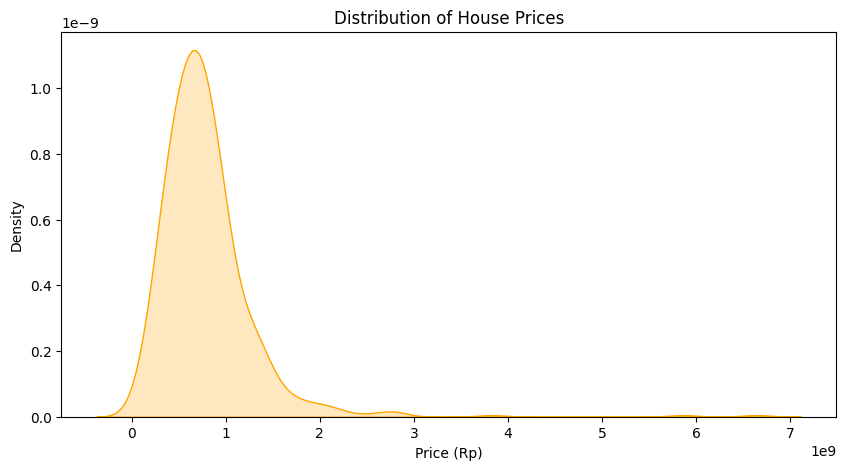

In [360]:
df_filtered = drop_outliers(df)

plt.figure(figsize=(10, 5))
sns.kdeplot(df_filtered['price_in_rp'], fill=True, color="orange")
plt.xlabel('Price (Rp)')
plt.ylabel('Density')
plt.title('Distribution of House Prices')
plt.show()

### House Price Distribution By City

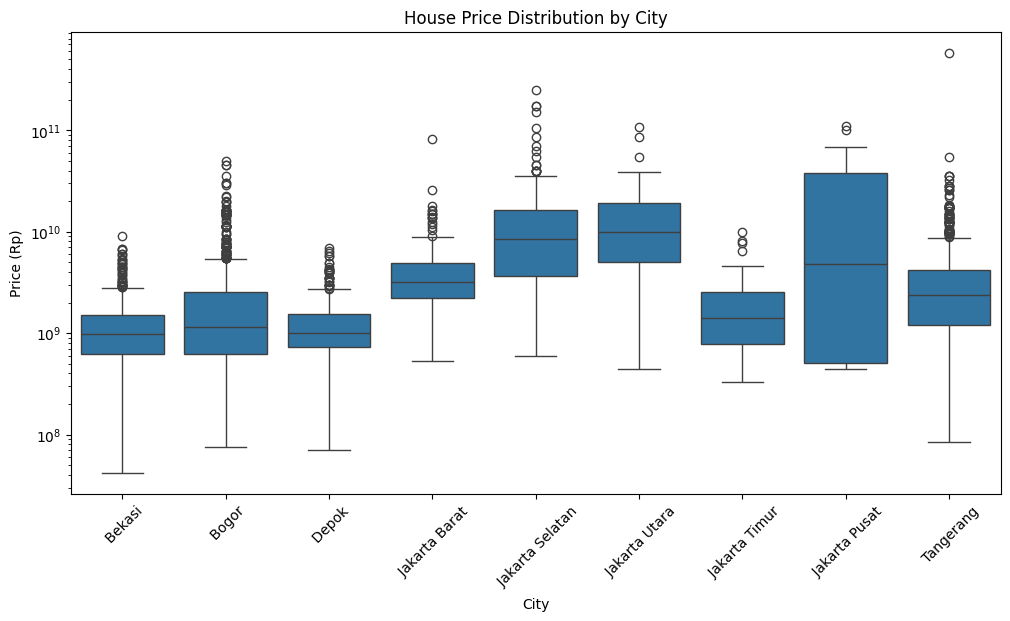

In [361]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price_in_rp', data=df)
plt.xlabel('City')
plt.ylabel('Price (Rp)')
plt.title('House Price Distribution by City')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

### Number of Houses per City

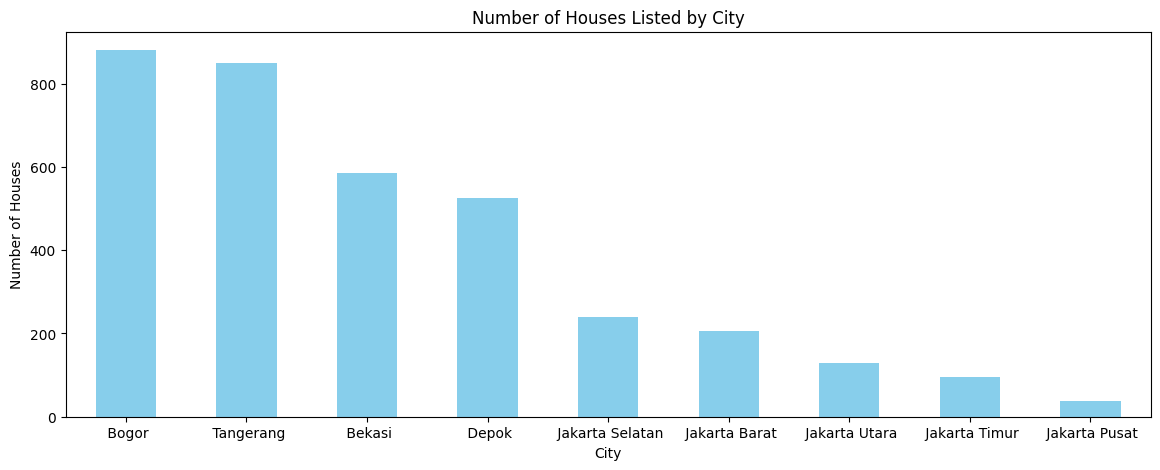

In [362]:
plt.figure(figsize=(14, 5))
df['city'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.title('Number of Houses Listed by City')
plt.xticks(rotation=0)
plt.show()

### Correlation Matrix

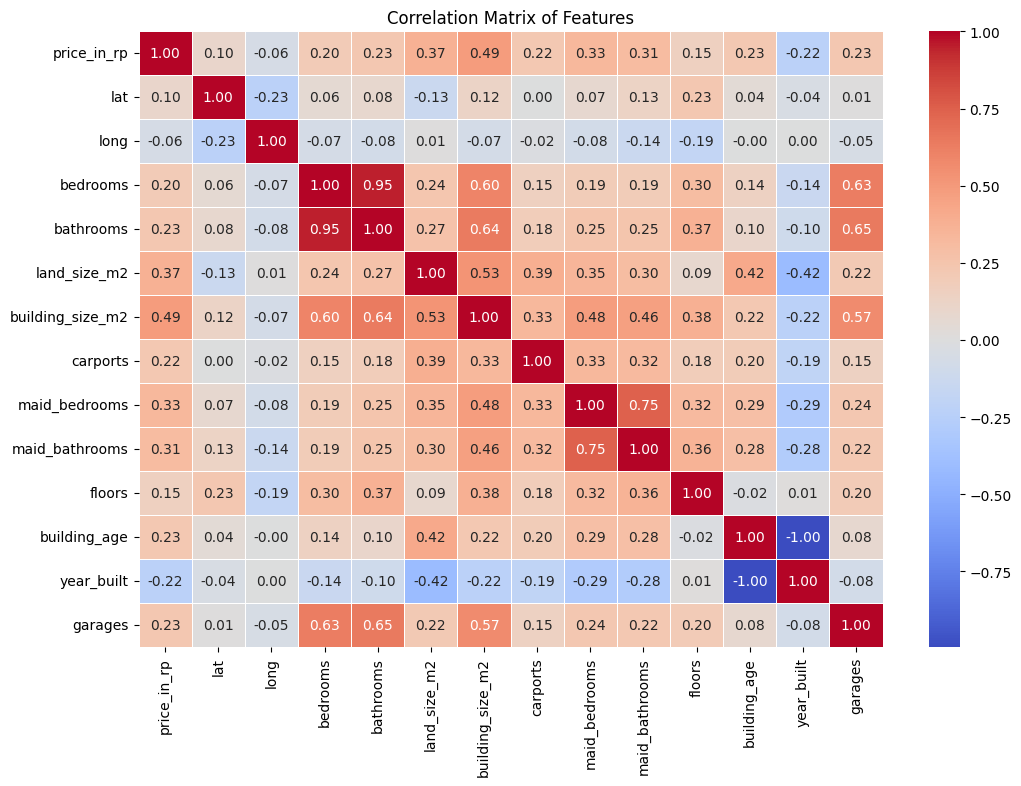

In [363]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

### Pair Plot of `price_in_rp`, `bedrooms`, `bathrooms`, `land_size_m2`, `building_size_m2`, `garages`

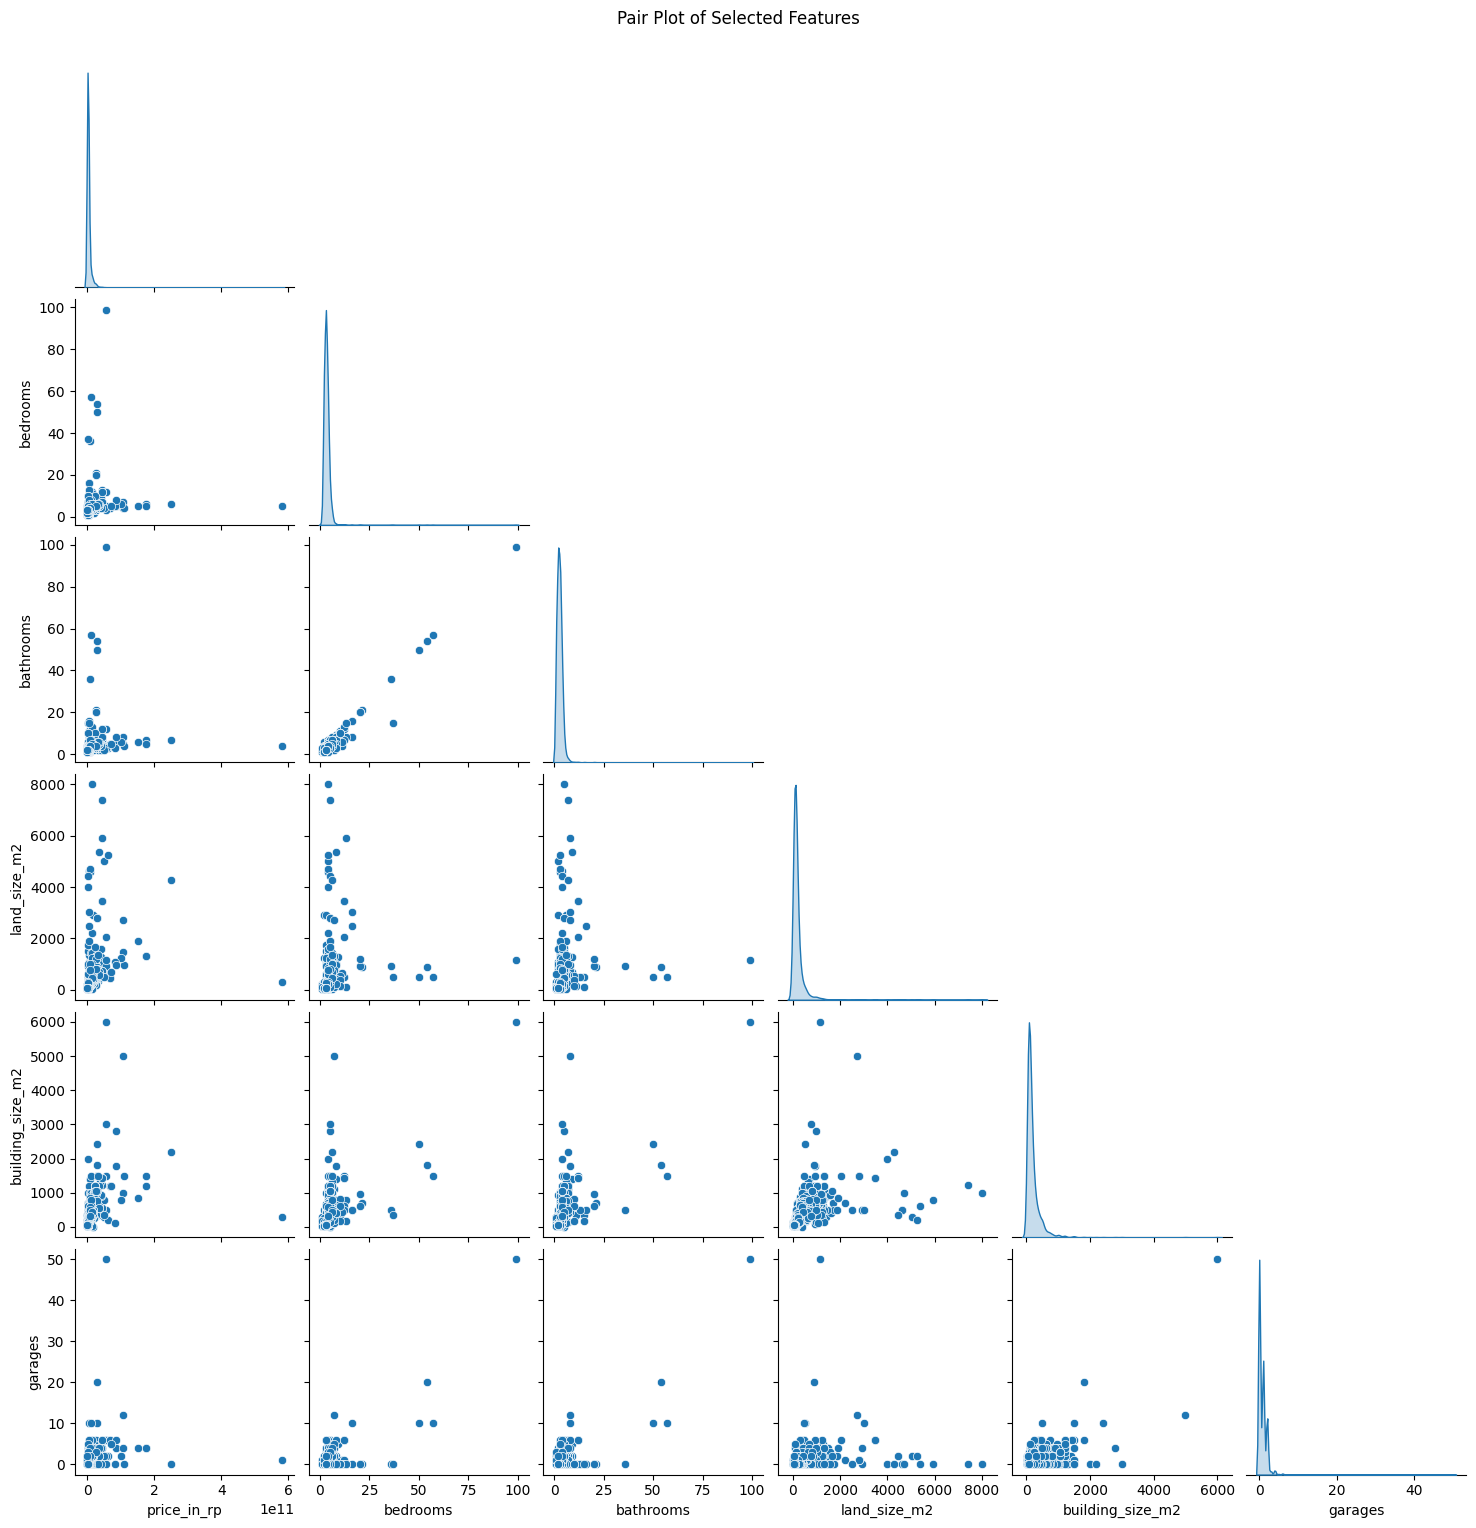

In [364]:
selected_features = ['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'garages']
df_cleaned = df[selected_features].dropna()
sns.pairplot(df_cleaned, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

# **Cluster Analysis**

### Choose features and clean

In [365]:
cluster_features = ['price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'garages']

df_cluster = df[cluster_features].dropna()
df_cluster = drop_outliers(df_cluster)

### Scale features

In [366]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

### Choose samples

In [367]:
df_sample = df_cluster.sample(n=min(1000, len(df_cluster)), random_state=42)
df_sample_scaled = scaler.fit_transform(df_sample)

### DBSCAN Clustering

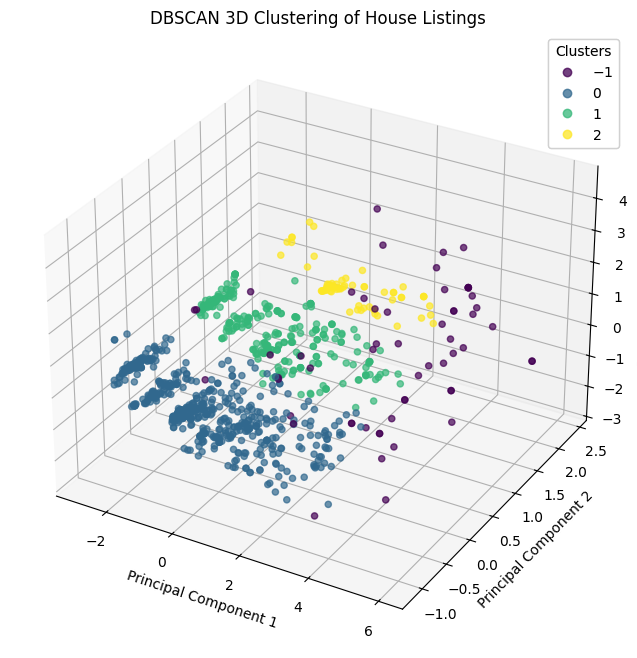

In [368]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

dbscan = DBSCAN(eps=1.5, min_samples=10)  
df_sample['Cluster'] = dbscan.fit_predict(df_sample_scaled)

pca_3d_dbscan = PCA(n_components=3)
df_pca_3d_dbscan = pca_3d_dbscan.fit_transform(df_sample_scaled)

df_sample['PCA1'] = df_pca_3d_dbscan[:, 0]
df_sample['PCA2'] = df_pca_3d_dbscan[:, 1]
df_sample['PCA3'] = df_pca_3d_dbscan[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_sample['PCA1'], df_sample['PCA2'], df_sample['PCA3'],
                     c=df_sample['Cluster'], cmap='viridis', alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'DBSCAN 3D Clustering of House Listings')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

The DBSCAN clustering algorithm has identified three main clusters (0, 1, 2) and one noise cluster (-1) from the dataset. The three distinct clusters indicate different categories of housing, likely based on price, size, or other key property attributes. Cluster -1 represents outliers, which could be properties with extreme values or unique characteristics that do not fit into any major group.

The three primary clusters suggest a natural segmentation in the housing market:

* Cluster 0 (Blue): This is the largest and densest group, likely representing affordable to mid-range properties that share common characteristics.

* Cluster 1 (Green): This group appears slightly more dispersed, possibly indicating higher-priced or larger properties with more variability.

* Cluster 2 (Yellow): The smallest cluster, which might represent premium or luxury properties, as it is more separate from the dense core.

# **Regression**

## Data Preprocessing

### Remove Irrelevant Features

In [369]:
df = df.drop(columns=['url', 'title', 'ads_id', 'lat', 'long'], axis=1)

### Handle Missing Values

In [370]:
from sklearn.impute import KNNImputer

missing_threshold = 0.4 
df = df.loc[:, df.isna().mean() <= missing_threshold]

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

df.isna().sum()

price_in_rp           0
address               0
district              0
city                  0
facilities            0
property_type         0
bedrooms              0
bathrooms             0
land_size_m2          0
building_size_m2      0
carports              0
certificate           0
electricity           0
maid_bedrooms         0
maid_bathrooms        0
floors                0
property_condition    0
garages               0
furnishing            0
dtype: int64

### Handle Outliers

In [371]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower_bound, upper_bound)

check_outliers(df)

{'price_in_rp': 0,
 'bedrooms': 0,
 'bathrooms': 0,
 'land_size_m2': 0,
 'building_size_m2': 0,
 'carports': 0,
 'maid_bedrooms': 0,
 'maid_bathrooms': 0,
 'floors': 0,
 'garages': 0}

### Encoding

##### One Hot Encoding

In [372]:
df = pd.get_dummies(df, columns=['property_type', 'furnishing'], drop_first=True)

##### Ordinal Encoding

In [373]:
df['property_condition'].unique()

array(['bagus', 'bagus sekali', 'baru', 'sudah renovasi',
       'butuh renovasi', 'semi furnished', 'unfurnished'], dtype=object)

In [374]:
condition_mapping = {
    'butuh renovasi': 1,
    'sudah renovasi': 2,
    'unfurnished': 3,
    'semi furnished': 4,
    'bagus': 5,
    'bagus sekali': 6,
    'baru': 7
}

df['property_condition'] = df['property_condition'].map(condition_mapping)

##### Target Encoding

In [375]:
high_cardinality_features = ['city', 'address', 'district', 'facilities', 'certificate', 'electricity']

for col in high_cardinality_features:
    df[f"{col}_encoded"] = df.groupby(col)['price_in_rp'].transform('mean')


df.drop(columns=high_cardinality_features, inplace=True)

### Preprocessing Results

In [376]:
df.head()

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished,city_encoded,address_encoded,district_encoded,facilities_encoded,certificate_encoded,electricity_encoded
0,2.990000e+09,4.0,4.0,239.0,272.0,0.0,0.0,1.0,2.0,5,0.0,0,0,1,1.280703e+09,2.272900e+09,2.272900e+09,2.990000e+09,2.524716e+09,4.261134e+09
1,1.270000e+09,3.0,2.0,55.0,69.0,1.0,0.0,0.0,2.0,5,0.0,0,0,1,1.280703e+09,2.272900e+09,2.272900e+09,3.695522e+09,2.571330e+09,1.605082e+09
2,1.950000e+09,3.0,3.0,119.0,131.0,1.0,1.0,1.0,2.0,5,1.0,0,0,1,1.280703e+09,2.272900e+09,2.272900e+09,1.950000e+09,2.571330e+09,1.605082e+09
3,3.300000e+09,3.0,3.0,180.0,174.0,0.0,1.0,1.0,2.0,6,2.0,0,0,1,1.280703e+09,2.272900e+09,2.272900e+09,3.300000e+09,2.524716e+09,3.567023e+09
4,4.500000e+09,4.0,3.0,328.0,196.0,2.0,1.0,1.0,2.0,5,1.0,0,0,1,1.280703e+09,2.272900e+09,2.272900e+09,3.425000e+09,2.524716e+09,3.567023e+09


## Model Training

In [390]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(columns=['price_in_rp'])  
y = df['price_in_rp']  
y = np.log1p(y)  # Log transformation to normalize the price distribution

models = {
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1, 10]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.1, 1, 10]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    }
}

all_results = {name: {"MAE": [], "RMSE": [], "R2": []} for name in models.keys()}

for i in range(100):
    print(f"Processing split {i}...")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    best_models = {}
    for name, config in models.items():
        grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_models[name] = grid_search.best_estimator_
    
    for name, model in best_models.items():
        y_pred = model.predict(X_test_scaled)
        all_results[name]["MAE"].append(mean_absolute_error(y_test, y_pred))
        all_results[name]["RMSE"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
        all_results[name]["R2"].append(r2_score(y_test, y_pred))

Processing split 0...
Processing split 1...
Processing split 2...
Processing split 3...
Processing split 4...
Processing split 5...
Processing split 6...
Processing split 7...
Processing split 8...
Processing split 9...
Processing split 10...
Processing split 11...
Processing split 12...
Processing split 13...
Processing split 14...
Processing split 15...
Processing split 16...
Processing split 17...
Processing split 18...
Processing split 19...
Processing split 20...
Processing split 21...
Processing split 22...
Processing split 23...
Processing split 24...
Processing split 25...
Processing split 26...
Processing split 27...
Processing split 28...
Processing split 29...
Processing split 30...
Processing split 31...
Processing split 32...
Processing split 33...
Processing split 34...
Processing split 35...
Processing split 36...
Processing split 37...
Processing split 38...
Processing split 39...
Processing split 40...
Processing split 41...
Processing split 42...
Processing split 43..

### Model Evaluation

In [414]:
import scipy.stats as stats

avg_results = {}
for name, vals in all_results.items():
    mae_mean = np.mean(vals["MAE"])
    mae_std = np.std(vals["MAE"])
    mae_ci = stats.norm.interval(0.95, loc=mae_mean, scale=mae_std / np.sqrt(len(vals["MAE"])))

    rmse_mean = np.mean(vals["RMSE"])
    rmse_std = np.std(vals["RMSE"])
    rmse_ci = stats.norm.interval(0.95, loc=rmse_mean, scale=rmse_std / np.sqrt(len(vals["RMSE"])))

    r2_mean = np.mean(vals["R2"])
    r2_std = np.std(vals["R2"])

    avg_results[name] = {
        "MAE Mean": mae_mean,
        "MAE Std": mae_std,
        "MAE 95% CI": mae_ci,
        "RMSE Mean": rmse_mean,
        "RMSE Std": rmse_std,
        "RMSE 95% CI": rmse_ci,
        "R2 Mean": r2_mean,
        "R2 Std": r2_std,
    }

results_df = pd.DataFrame(avg_results).T
results_df

,MAE Mean,MAE Std,MAE 95% CI,RMSE Mean,RMSE Std,RMSE 95% CI,R2 Mean,R2 Std
RandomForest,0.115392,0.006709,"(0.11407725103191056, 0.1167070289611329)",0.216797,0.024652,"(0.21196564456146627, 0.22162897610251148)",0.947456,0.011714
GradientBoosting,0.128225,0.006018,"(0.12704591554183448, 0.129405066693753)",0.213726,0.0229,"(0.20923814813316124, 0.21821474182926456)",0.948996,0.010593
Ridge,0.271392,0.009009,"(0.2696260023212556, 0.2731575191887287)",0.363056,0.017464,"(0.3596332149985572, 0.366479048587309)",0.854089,0.011493
Lasso,0.292416,0.010845,"(0.2902902492460676, 0.2945413357344191)",0.391036,0.019734,"(0.38716828961528515, 0.3949039720978077)",0.830748,0.013595
SVR,0.189242,0.007076,"(0.18785515914130896, 0.1906288084619518)",0.283565,0.024401,"(0.27878296889330206, 0.2883479913947338)",0.910564,0.014729


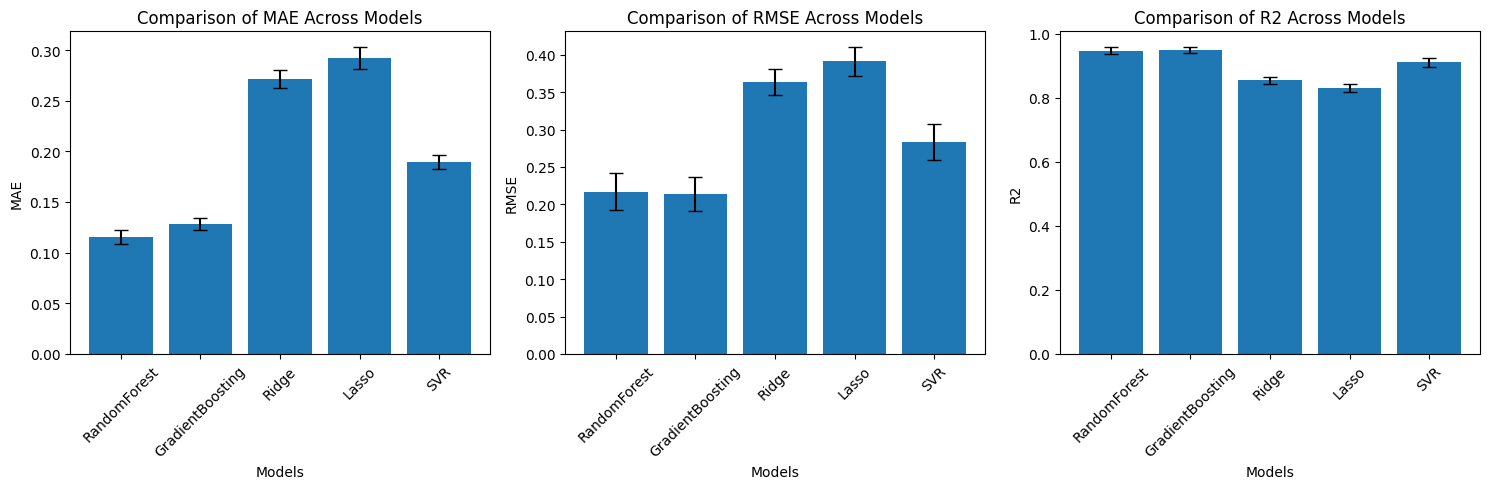

In [ ]:
models = list(all_results.keys())
metrics = ["MAE", "RMSE", "R2"]

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    data = [all_results[model][metric] for model in models]
    mean_values = [np.mean(d) for d in data]
    std_values = [np.std(d) for d in data]
    plt.bar(models, mean_values, yerr=std_values, capsize=5)
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"Comparison of {metric} Across Models")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

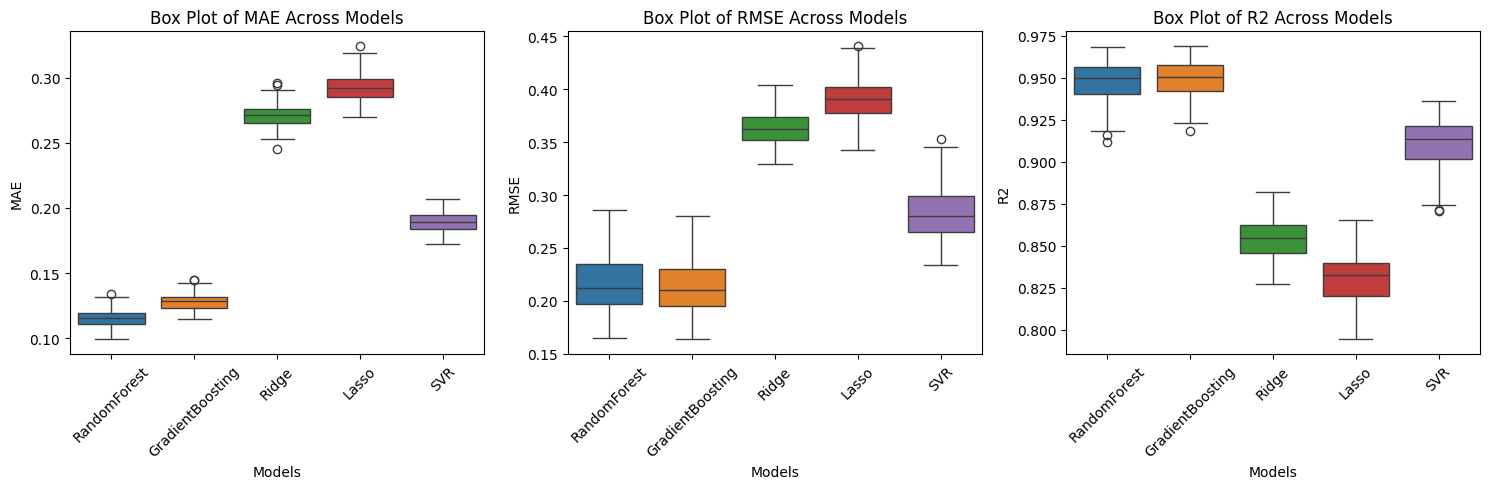

In [405]:
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    data = pd.DataFrame({model: all_results[model][metric] for model in models})
    sns.boxplot(data=data)
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.title(f"Box Plot of {metric} Across Models")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [412]:
best_splits = {}
for model in models:
    best_idx = np.argmax(all_results[model]["R2"])
    best_splits[model] = {
        "Best Split Index": best_idx,
        "MAE": all_results[model]["MAE"][best_idx],
        "RMSE": all_results[model]["RMSE"][best_idx],
        "R2": all_results[model]["R2"][best_idx]
    }

best_splits_df = pd.DataFrame(best_splits).T
best_splits_df.sort_values(by="R2", ascending=False, inplace=True)
best_splits_df


,Best Split Index,MAE,RMSE,R2
GradientBoosting,8.0,0.115025,0.163515,0.969032
RandomForest,8.0,0.103085,0.165057,0.968445
SVR,8.0,0.177140,0.234174,0.936485
Ridge,50.0,0.252972,0.329353,0.882026
Lasso,50.0,0.273134,0.351876,0.865339


The training results across 100 splits reveal overall performance trends for each model. Random Forest and Gradient Boosting achieved the best balance of accuracy and consistency, with mean MAE values of 0.115 and 0.128, respectively. Their RMSE values were also the lowest, with Random Forest averaging 0.216 and Gradient Boosting 0.213, indicating reliable predictions. Both models had high R² scores above 0.94, showing strong correlation with actual house prices. SVR had moderate performance, with an average MAE of 0.189 and RMSE of 0.283, while maintaining a relatively high R² of 0.91. On the other hand, Ridge and Lasso performed the worst, with average MAE values of 0.271 and 0.292, respectively. Their RMSE values were also the highest, at 0.363 and 0.391, suggesting larger prediction errors. Additionally, their R² values were significantly lower at 0.85 and 0.83, meaning they explained less variance in the data compared to the tree-based models. The box plots confirm these findings, showing that Ridge and Lasso have the highest spread in error distribution, whereas Random Forest and Gradient Boosting exhibit the most stable performance across splits.

# **Conclusion**

The overall analysis of 100 splits confirms that Random Forest and Gradient Boosting are the most reliable models for house price prediction, offering both high accuracy and stability. SVR shows moderate performance but with higher errors. Ridge and Lasso demonstrate weaker predictive power and higher variability, making them less suitable for this task. Future improvements can focus on refining feature selection and hyperparameter tuning to further optimize the best-performing models.